In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seaborninstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [63]:
dataset = pd.read_csv('/content/weather.csv')

In [64]:
print(dataset.shape)

(366, 22)


In [65]:
print(dataset.describe())

          MinTemp     MaxTemp    Rainfall  Evaporation    Sunshine  \
count  366.000000  366.000000  366.000000   366.000000  363.000000   
mean     7.265574   20.550273    1.428415     4.521858    7.909366   
std      6.025800    6.690516    4.225800     2.669383    3.481517   
min     -5.300000    7.600000    0.000000     0.200000    0.000000   
25%      2.300000   15.025000    0.000000     2.200000    5.950000   
50%      7.450000   19.650000    0.000000     4.200000    8.600000   
75%     12.500000   25.500000    0.200000     6.400000   10.500000   
max     20.900000   35.800000   39.800000    13.800000   13.600000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count     364.000000    359.000000    366.000000   366.000000   366.000000   
mean       39.840659      9.651811     17.986339    72.035519    44.519126   
std        13.059807      7.951929      8.856997    13.137058    16.850947   
min        13.000000      0.000000      0.000000    36.00

# **ploting dataset in 2D point**

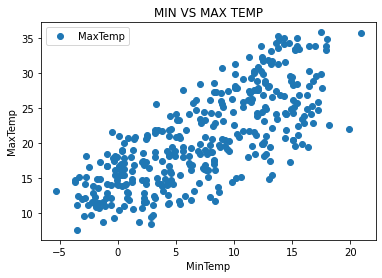

In [66]:
dataset.plot(x='MinTemp', y='MaxTemp', style = 'o')
plt.title('MIN VS MAX TEMP')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

# **EDA** Average of our output variable 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


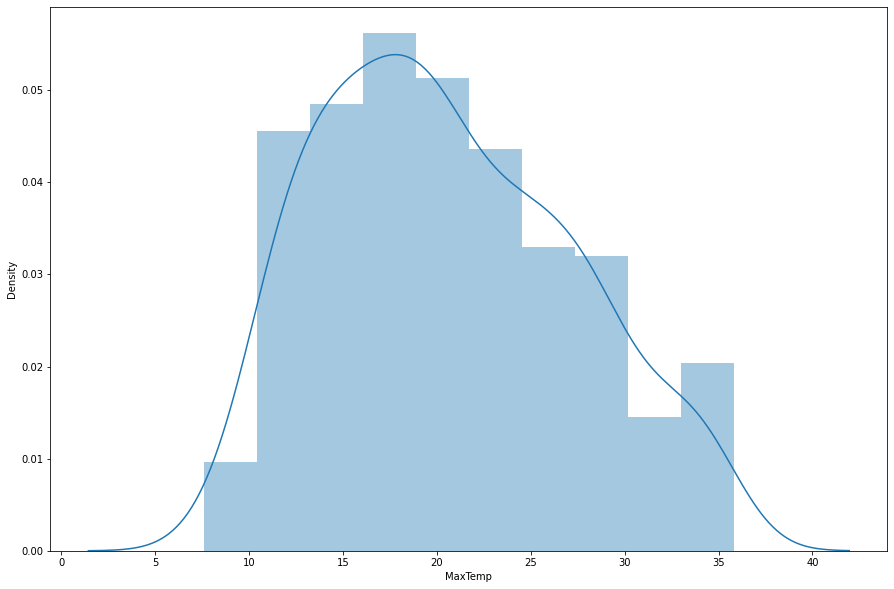

In [36]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seaborninstance.distplot(dataset['MaxTemp'])
plt.show()

# **DATA Splicing**

In [37]:
X =  dataset['MinTemp'].values.reshape(-1,1)
Y =  dataset['MaxTemp'].values.reshape(-1,1)

# **Spliting data**

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [40]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [41]:
print('Intercept', regressor.intercept_)
print('Coefficient', regressor.coef_)

Intercept [14.56202411]
Coefficient [[0.81953755]]


In [42]:
Y_pred = regressor.predict (X_test)

In [67]:
df = pd.DataFrame({'Actual' : Y_test.flatten(), 'Predicted' : Y_pred.flatten()})
print(df)

    Actual  Predicted
0     25.2  23.413030
1     11.5  13.086857
2     21.1  27.264856
3     22.2  25.461874
4     20.4  26.937041
..     ...        ...
69    18.9  20.216833
70    22.8  27.674625
71    16.1  21.446140
72    25.1  24.970151
73    12.2  14.070302

[74 rows x 2 columns]


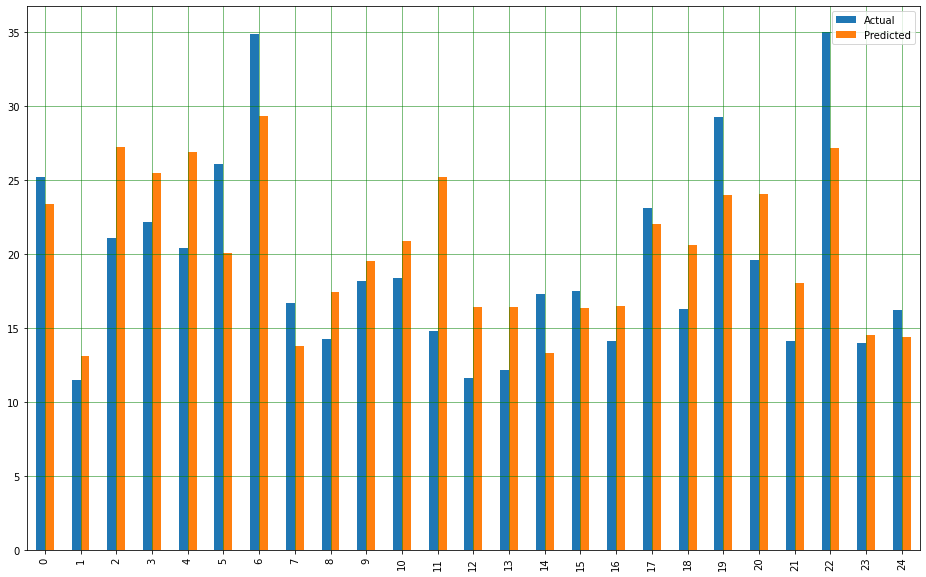

In [68]:
df1 = df.head(25)
df1.plot(kind = 'bar', figsize = (16,10)) 
plt.grid(which='major', linestyle='-', linewidth = '0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth = '0.5', color='black')
plt.show()

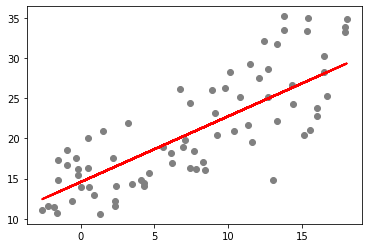

In [55]:
plt.scatter(X_test,Y_test, color='gray')
plt.plot(X_test, Y_pred, color='red', linewidth='2')
plt.show()

In [57]:
print('Mean Absolute Error : ', metrics.mean_absolute_error(Y_test,Y_pred))
print('Mean Square Error : ', metrics.mean_squared_error(Y_test,Y_pred))
print('Root Mean Square Error : ', np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

Mean Absolute Error :  3.5094353112899594
Mean Square Error :  17.011877668640622
Root Mean Square Error :  4.124545753006096
